## EXPERIMENT 1.1: MagFace

In [1]:
## Load libraries

import numpy as np
import cv2
from matplotlib import pyplot as plt
import torch
import seaborn as sns
import pandas as pd
from sklearn.preprocessing import normalize
import sys
sns.set(style="white")
%matplotlib inline
sys.path.append('../../utils')
from Model_utils.Model_funcs import *
from Result_metric_utils.result_metrics import *
from Data_proc_utils.Data_proc_funcs import *
from DET_utils.DET_plots import *
from DET_utils.DET import *
from Plotting_stats_utils.plotting_threshold import *
from Plotting_stats_utils.stats_tables import *
from IPython import embed

from scipy.stats import describe, gaussian_kde
import math


In [2]:
# Save figures
from matplotlib import pyplot as plt
save_fig_path = '../../figures/mag_1_1/'


### MagFace Results

This notebook loads the feature vectors from MagFace and run them through the results metrics:
FNIR, FPIR, FND, FPD, and GARBE

# Load data

In [3]:
feature_list_children = '../../data/data_full/feature_vectors/magface_feature_vectors/1.1/feature_vectors_from_children_filtered_bibel_FINAL_INFERENCE_baseline_ex_1_1.list'
feature_list_adults = '../../data/data_full/feature_vectors/magface_feature_vectors/feature_vectors_from_adults_bibel_cropped_retina_all.list'

def load_and_compute_similarity(feature_list, dtype=np.float32):
    # Load data
    image_names, ids, num_ids, norm_feats = load_magface_vectors(feature_list)

    # Convert dtype to reduce memory usage
    norm_feats = norm_feats.astype(dtype)

    # Compute similarity matrix incrementally if possible
    sim_mat = np.dot(norm_feats, norm_feats.T)

    return image_names, ids, num_ids, sim_mat


In [4]:
# Load and compute for children
image_names_c, ids_c, num_ids_c, sim_mat_c = load_and_compute_similarity(feature_list_children)


/data/data_full/children_filtered_bibel_FINAL_INFERENCE/Indian_89/Indian_89_5.png
/data/data_full/children_filtered_bibel_FINAL_INFERENCE/Indian_89/Indian_89_1.png
/data/data_full/children_filtered_bibel_FINAL_INFERENCE/Indian_89/Indian_89_2.png
/data/data_full/children_filtered_bibel_FINAL_INFERENCE/Indian_m.04n3v0_/m.04n3v0__0002.jpg
/data/data_full/children_filtered_bibel_FINAL_INFERENCE/Asian_270/Asian_270_1.png
/data/data_full/children_filtered_bibel_FINAL_INFERENCE/Asian_270/Asian_270_3.png
/data/data_full/children_filtered_bibel_FINAL_INFERENCE/Asian_270/Asian_270_2.png
/data/data_full/children_filtered_bibel_FINAL_INFERENCE/Asian_344/Asian_344_19.png
/data/data_full/children_filtered_bibel_FINAL_INFERENCE/Asian_344/Asian_344_21.png
/data/data_full/children_filtered_bibel_FINAL_INFERENCE/Caucasian_167/Caucasian_167_26.png
/data/data_full/children_filtered_bibel_FINAL_INFERENCE/Caucasian_167/Caucasian_167_38.png
/data/data_full/children_filtered_bibel_FINAL_INFERENCE/Caucasian_16

In [5]:

# Load and compute for adults
image_names_a, ids_a, num_ids_a, sim_mat_a = load_and_compute_similarity(feature_list_adults)


/data/data_full/adults_filtered_bibel_cropped_resized_retina/Indian_m.02nrz2/m.02nrz2_0003.jpg
/data/data_full/adults_filtered_bibel_cropped_resized_retina/Indian_m.02nrz2/m.02nrz2_0001.jpg
/data/data_full/adults_filtered_bibel_cropped_resized_retina/Indian_m.02nrz2/m.02nrz2_0004.jpg
/data/data_full/adults_filtered_bibel_cropped_resized_retina/Indian_m.01241v/m.01241v_0002.jpg
/data/data_full/adults_filtered_bibel_cropped_resized_retina/African_m.05zn751/m.05zn751_0001.jpg
/data/data_full/adults_filtered_bibel_cropped_resized_retina/African_m.05zn751/m.05zn751_0002.jpg
/data/data_full/adults_filtered_bibel_cropped_resized_retina/African_m.05zn751/m.05zn751_0004.jpg
/data/data_full/adults_filtered_bibel_cropped_resized_retina/Indian_m.04n3v0_/m.04n3v0__0001.jpg
/data/data_full/adults_filtered_bibel_cropped_resized_retina/Indian_m.0kvkdqp/m.0kvkdqp_0001.jpg
/data/data_full/adults_filtered_bibel_cropped_resized_retina/Indian_m.0kvkdqp/m.0kvkdqp_0004.jpg
/data/data_full/adults_filtered_bib

In [6]:


# Dataframes with info, removes names not in magface results
children_all = pd.read_csv('../../data/image_info_csvs/final_filtered_children_df_BIBEL.csv')
children_all = children_all[children_all.image_name.isin(image_names_c)]

adults_all_org = pd.read_csv('../../data/image_info_csvs/final_filtered_adults_df_BIBEL.csv')
adults_all = adults_all_org[adults_all_org.image_name.isin(image_names_a)]

# Find the threshold

In [7]:
random_states = [1,2]
percentiles = np.arange(0.0, 1.0, 0.03).tolist()

df_all_threshold_x = compute_metrics_ex_1_1(random_states, percentiles, children_all, adults_all, image_names_c, image_names_a, sim_mat_c, sim_mat_a, num_ids_c, num_ids_a, ids_c, ids_a, balance_child_data, balance_adults_data_enrolled, compute_fnir, compute_fpir, GARBE)


FPD result:  0.0
FND result:  0.08735883078675145
GARBE result, GARBE close to 1 means more unfair:  0.0655191230900636
Done for random_state: 1, percentile: 0.0
FPD result:  0.0
FND result:  0.08421229425596237
GARBE result, GARBE close to 1 means more unfair:  0.06315922069197177
Done for random_state: 1, percentile: 0.03
FPD result:  0.0
FND result:  0.3082535551631192
GARBE result, GARBE close to 1 means more unfair:  0.2311901663723394
Done for random_state: 1, percentile: 0.06
FPD result:  0.0
FND result:  0.31747401017474014
GARBE result, GARBE close to 1 means more unfair:  0.2381055076310551
Done for random_state: 1, percentile: 0.09
FPD result:  0.0
FND result:  0.25969714618520673
GARBE result, GARBE close to 1 means more unfair:  0.19477285963890506
Done for random_state: 1, percentile: 0.12
FPD result:  0.0
FND result:  0.16885149415447176
GARBE result, GARBE close to 1 means more unfair:  0.12663862061585382
Done for random_state: 1, percentile: 0.15
FPD result:  0.0
FND 

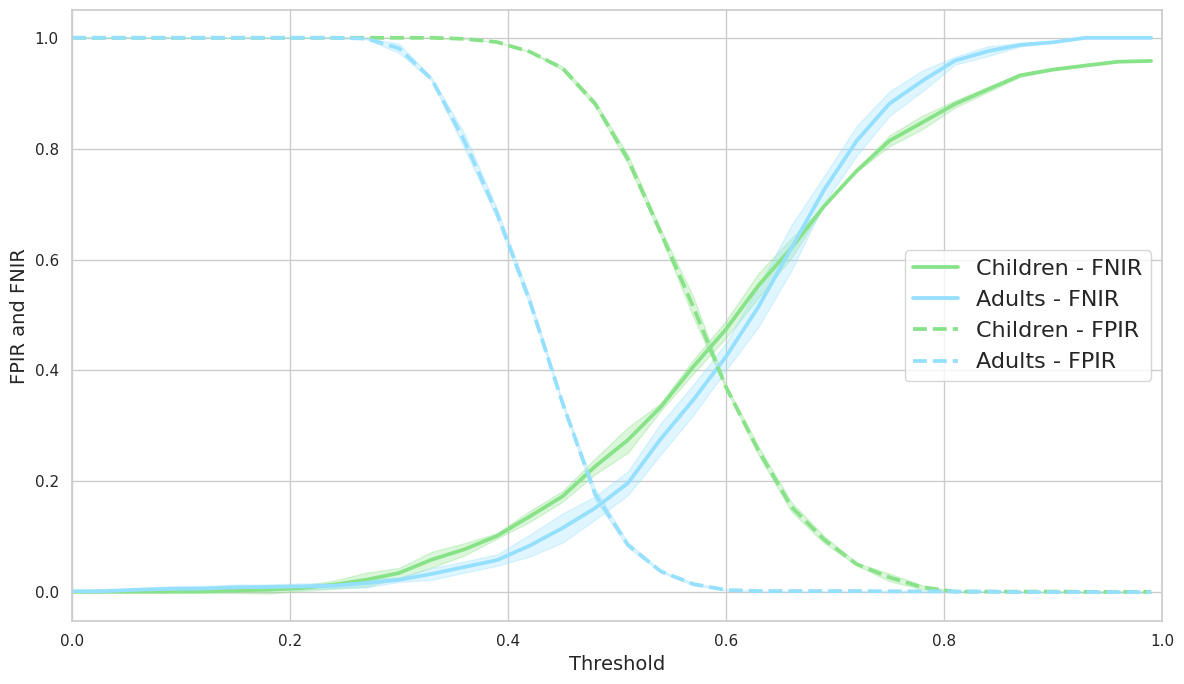

In [8]:

plot_threshold_metrics_ex_1_1_together_w_conf(df_all_threshold_x, 'MagFace ex. 1.1', save_fig_path)

In [9]:


def plot_threshold_metrics_ex_1_1_together_w_conf_zoomed(df_all_threshold_x, title, save_fig_path):
    # Set the aesthetics for the plots
    sns.set(style="whitegrid")

    plot_df_mean = df_all_threshold_x.groupby('Threshold').mean()
    plot_df_std = df_all_threshold_x.groupby('Threshold').std()
    count = df_all_threshold_x.groupby('Threshold').size().values

    # Calculate the 95% confidence intervals
    ci_factor = 1.96
    plot_df_ci = plot_df_std / np.sqrt(count[:, None]) * ci_factor

    plt.figure(figsize=(12, 7))

    # Plot FNIR with confidence intervals
    plt.plot(plot_df_mean.index, plot_df_mean['FNIR_c'], color='#88E288', linestyle='-', label='Children - FNIR', linewidth=2.7)
    plt.fill_between(plot_df_mean.index, plot_df_mean['FNIR_c'] - plot_df_ci['FNIR_c'], plot_df_mean['FNIR_c'] + plot_df_ci['FNIR_c'], color='#88E288', alpha=0.4)
    plt.plot(plot_df_mean.index, plot_df_mean['FNIR_a'], color='#95DFFF', linestyle='-', label='Adults - FNIR', linewidth=2.7)
    plt.fill_between(plot_df_mean.index, plot_df_mean['FNIR_a'] - plot_df_ci['FNIR_a'], plot_df_mean['FNIR_a'] + plot_df_ci['FNIR_a'], color='#95DFFF', alpha=0.4)

    plt.xlabel('Threshold', fontsize=14)
    plt.ylabel('FNIR and FPIR', fontsize=14)
    # plt.title('FNIR vs Threshold', fontsize=16)
    plt.xlim(0.28, 0.34)
    plt.ylim(0.02,0.06)
    plt.legend(fontsize=16)
    plt.grid(True)

    # Plot FPIR with confidence intervals
    plt.plot(plot_df_mean.index, plot_df_mean['FPIR_c'], color='#88E288', linestyle='--', label='Children - FPIR', linewidth=2.7)
    plt.fill_between(plot_df_mean.index, plot_df_mean['FPIR_c'] - plot_df_ci['FPIR_c'], plot_df_mean['FPIR_c'] + plot_df_ci['FPIR_c'], color='#88E288', alpha=0.4)
    plt.plot(plot_df_mean.index, plot_df_mean['FPIR_a'], color='#95DFFF', linestyle='--', label='Adults - FPIR', linewidth=2.7)
    plt.fill_between(plot_df_mean.index, plot_df_mean['FPIR_a'] - plot_df_ci['FPIR_a'], plot_df_mean['FPIR_a'] + plot_df_ci['FPIR_a'], color='#95DFFF', alpha=0.4)

    plt.xlabel('Threshold', fontsize=14)
    plt.ylabel('FPIR and FNIR', fontsize=14)
    # plt.title(f'FPIR and FNIR vs Threshold - {title}', fontsize=16)
    plt.xlim(0.28, 0.34)
    plt.ylim(0.02,0.06)
    plt.legend(fontsize=16)
    plt.grid(True)

    plt.tight_layout()
    # Show the plot
    plt.show()

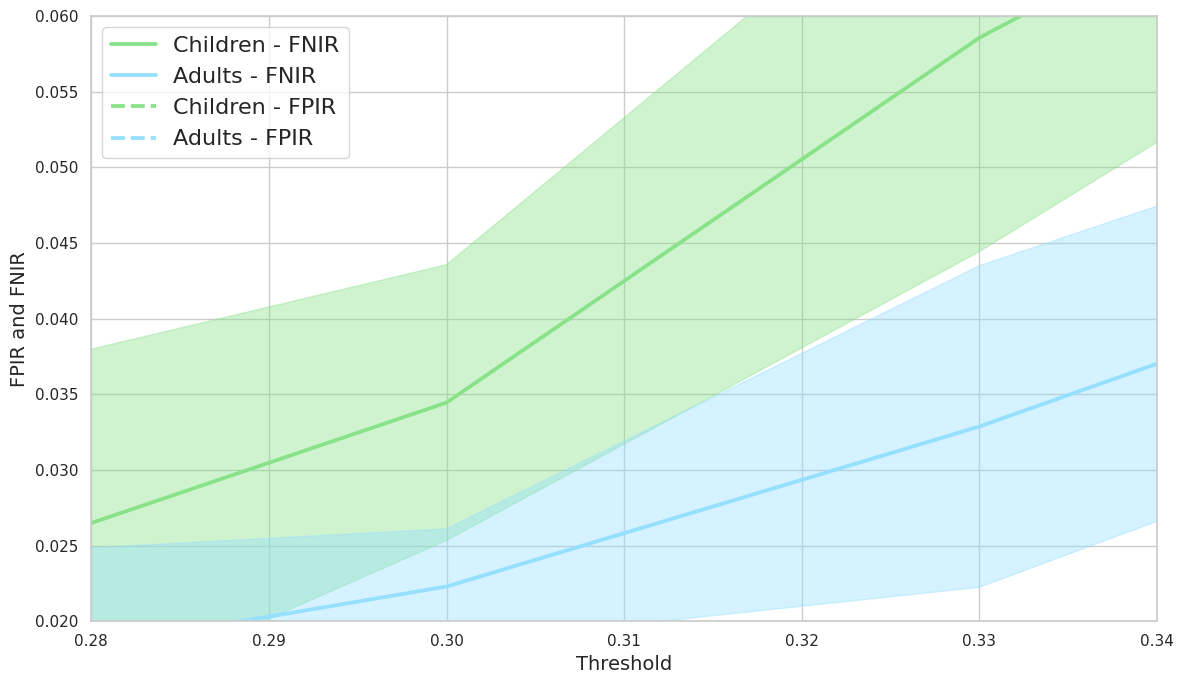

In [10]:
plot_threshold_metrics_ex_1_1_together_w_conf_zoomed(df_all_threshold_x, 'MagFace ex. 1.1', save_fig_path)

### the threshold should be 32

# Stats - 10 experiments

In [7]:

random_states = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10]

# Automatic threshold finding
# df_all_results, sim_mat_dict_all_magface_ex1_1 = evaluate_metrics_ex_1_1(
#     random_states, children_all, adults_all, image_names_c, image_names_a,
#     sim_mat_c, sim_mat_a, num_ids_c, num_ids_a, ids_c, ids_a, balance_child_data,
#     balance_adults_data_enrolled, compute_fnir, compute_fpir, GARBE, remove_ones, df_all_threshold_x[df_all_threshold_x.FNIR_c <0.05].Threshold.max()
# )

# Insert threshold manually
df_all_results, sim_mat_dict_all_magface_ex1_1 = evaluate_metrics_ex_1_1(
    random_states, children_all, adults_all, image_names_c, image_names_a,
    sim_mat_c, sim_mat_a, num_ids_c, num_ids_a, ids_c, ids_a, balance_child_data,
    balance_adults_data_enrolled, compute_fnir, compute_fpir, GARBE, remove_ones, 0.320
)




NEW FPD result:  1.051776649746193
NEW FND result:  1.7164686941934086
NEW GARBE result, GARBE close to 1 means more unfair:  1.5502956830816048
done
NEW FPD result:  1.0436105476673427
NEW FND result:  1.7885937995979262
NEW GARBE result, GARBE close to 1 means more unfair:  1.6023479866152803
done
NEW FPD result:  1.0506329113924051
NEW FND result:  1.8558101338589144
NEW GARBE result, GARBE close to 1 means more unfair:  1.6545158282422872
done
NEW FPD result:  1.041407867494824
NEW FND result:  1.8456282694566029
NEW GARBE result, GARBE close to 1 means more unfair:  1.6445731689661582
done
NEW FPD result:  1.046747967479675
NEW FND result:  2.099311926605505
NEW GARBE result, GARBE close to 1 means more unfair:  1.8361709368240473
done
NEW FPD result:  1.0452209660842755
NEW FND result:  1.2565874156551051
NEW GARBE result, GARBE close to 1 means more unfair:  1.2037458032623978
done
NEW FPD result:  1.0443298969072166
NEW FND result:  1.3940510508557846
NEW GARBE result, GARBE cl

In [8]:
# Generate the LaTeX table
latex_table = generate_latex_table(df_all_results.applymap(lambda x: f"{x:.3f}").drop(columns='Iteration'))
print(latex_table)


\begin{table}
\caption{Descriptive Statistics} 
\label{table:descriptive_stats} 
\begin{tabular}{ccccccccc} 
\toprule
\textbf{{Iter.}} & $FNIR_c$ & $FNIR_a$ & $FPIR_c$ & $FPIR_a$ & $FPD$ & $FND$ & $GARBE$ & $T$ \\
\midrule
\textbf{0} & 0.057 & 0.033 & 1.000 & 0.951 & 1.052 & 1.716 & 1.550 & 0.320 \\
\textbf{1} & 0.044 & 0.025 & 1.000 & 0.958 & 1.044 & 1.789 & 1.602 & 0.320 \\
\textbf{2} & 0.047 & 0.025 & 1.000 & 0.952 & 1.051 & 1.856 & 1.655 & 0.320 \\
\textbf{3} & 0.044 & 0.024 & 1.000 & 0.960 & 1.041 & 1.846 & 1.645 & 0.320 \\
\textbf{4} & 0.052 & 0.025 & 1.000 & 0.955 & 1.047 & 2.099 & 1.836 & 0.320 \\
\textbf{5} & 0.046 & 0.036 & 1.000 & 0.957 & 1.045 & 1.257 & 1.204 & 0.320 \\
\textbf{6} & 0.041 & 0.029 & 1.000 & 0.958 & 1.044 & 1.394 & 1.307 & 0.320 \\
\textbf{7} & 0.054 & 0.021 & 1.000 & 0.955 & 1.047 & 2.573 & 2.191 & 0.320 \\
\textbf{8} & 0.047 & 0.020 & 1.000 & 0.959 & 1.043 & 2.317 & 1.999 & 0.320 \\
\textbf{9} & 0.048 & 0.028 & 1.000 & 0.955 & 1.047 & 1.735 & 1.563 & 0.320 

/var/folders/hl/6j_44f453mvc5lr922s8d0l80000gn/T/ipykernel_6404/3719310588.py:2: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  latex_table = generate_latex_table(df_all_results.applymap(lambda x: f"{x:.3f}").drop(columns='Iteration'))


In [9]:
latex_table = generate_latex_table(df_all_results.describe().applymap(lambda x: f"{x:.3f}").drop(columns='Iteration'))
print(latex_table)

\begin{table}
\caption{Descriptive Statistics} 
\label{table:descriptive_stats} 
\begin{tabular}{ccccccccc} 
\toprule
\textbf{{Iter.}} & $FNIR_c$ & $FNIR_a$ & $FPIR_c$ & $FPIR_a$ & $FPD$ & $FND$ & $GARBE$ & $T$ \\
\midrule
\textbf{count} & 10.000 & 10.000 & 10.000 & 10.000 & 10.000 & 10.000 & 10.000 & 10.000 \\
\textbf{mean} & 0.048 & 0.026 & 1.000 & 0.956 & 1.046 & 1.858 & 1.655 & 0.320 \\
\textbf{std} & 0.005 & 0.005 & 0.000 & 0.003 & 0.003 & 0.394 & 0.295 & 0.000 \\
\textbf{min} & 0.041 & 0.020 & 1.000 & 0.951 & 1.041 & 1.257 & 1.204 & 0.320 \\
\textbf{25%} & 0.044 & 0.024 & 1.000 & 0.955 & 1.044 & 1.721 & 1.554 & 0.320 \\
\textbf{50%} & 0.047 & 0.025 & 1.000 & 0.956 & 1.046 & 1.817 & 1.623 & 0.320 \\
\textbf{75%} & 0.051 & 0.029 & 1.000 & 0.958 & 1.047 & 2.038 & 1.791 & 0.320 \\
\textbf{max} & 0.057 & 0.036 & 1.000 & 0.960 & 1.052 & 2.573 & 2.191 & 0.320 \\
\bottomrule
\end{tabular} 
\end{table}



/var/folders/hl/6j_44f453mvc5lr922s8d0l80000gn/T/ipykernel_6404/2945641856.py:1: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  latex_table = generate_latex_table(df_all_results.describe().applymap(lambda x: f"{x:.3f}").drop(columns='Iteration'))


In [10]:
df_all_results.to_csv('df_all_results_mag_1_1.csv', index=False)


# Stats

In [11]:
import scipy.stats as stats
t_statistic, p_value = stats.ttest_rel(df_all_results['FNIR_c'], df_all_results['FNIR_a'])

# Output the results
print(f'T-statistic: {t_statistic}')
print(f'P-value: {p_value}')

T-statistic: 9.54353103959339
P-value: 5.271790096351922e-06


# Gemmer simscores

In [12]:
df_all_results.to_csv('results_10_experiment_1_1_magface.csv')

In [13]:
def concatenate_and_save_arrays(sim_mat_dict_all_magface_ex1_1, prefix, output_filename, iterations=10):
    # List to hold all the arrays
    iterations_list = []

    # Loop to access each array and append it to the list
    for i in range(1, iterations + 1):
        key = f'{prefix}_iteration_{i}'
        if key in sim_mat_dict_all_magface_ex1_1:
            iterations_list.append(sim_mat_dict_all_magface_ex1_1[key])

    # Concatenate all arrays into one big array
    all_iterations_array = np.concatenate(iterations_list)
    all_iterations_df = pd.DataFrame(all_iterations_array)

    # Save to CSV
    all_iterations_df.to_csv(output_filename, index=False)

    # Print the length of the big array
    print(len(all_iterations_df))

# Example usage
concatenate_and_save_arrays(sim_mat_dict_all_magface_ex1_1, 'sim_mat_c_enrolled', 'sim_mat_c_enrolled_iterations_all.csv')
concatenate_and_save_arrays(sim_mat_dict_all_magface_ex1_1, 'sim_mat_a_enrolled', 'sim_mat_a_enrolled_iterations_all.csv')
concatenate_and_save_arrays(sim_mat_dict_all_magface_ex1_1, 'sim_mat_c_non_enrolled', 'sim_mat_c_non_enrolled_iterations_all.csv')
concatenate_and_save_arrays(sim_mat_dict_all_magface_ex1_1, 'sim_mat_a_non_enrolled', 'sim_mat_a_non_enrolled_iterations_all.csv')


125196
41438
32751054
32371232


# Loading pre-saved stuff

In [18]:
sim_mat_c_enrolled_iterations_all = (pd.read_csv('sim_mat_c_enrolled_iterations_all.csv')).values.flatten()
sim_mat_a_enrolled_iterations_all = (pd.read_csv('sim_mat_a_enrolled_iterations_all.csv')).values.flatten()
sim_mat_c_non_enrolled_iterations_all = (pd.read_csv('sim_mat_c_non_enrolled_iterations_all.csv')).values.flatten()
sim_mat_a_non_enrolled_iterations_all = (pd.read_csv('sim_mat_a_non_enrolled_iterations_all.csv')).values.flatten()


In [19]:

def descriptive_statistics(mated_scores, nonmated_scores):
    stats_labels = ["Observations", "Minimum", "Maximum", "Mean", "St. Dev.", "Skewness", "Ex. Kurtosis"]
    mated_stats = describe(mated_scores)
    mated_stats = [mated_stats.nobs, mated_stats.minmax[0], mated_stats.minmax[1], mated_stats.mean, math.sqrt(mated_stats.variance), mated_stats.skewness, mated_stats.kurtosis]
    nonmated_stats = describe(nonmated_scores)
    nonmated_stats = [nonmated_stats.nobs, nonmated_stats.minmax[0], nonmated_stats.minmax[1], nonmated_stats.mean, math.sqrt(nonmated_stats.variance), nonmated_stats.skewness, nonmated_stats.kurtosis]

    stats_system_df = pd.DataFrame(np.array([stats_labels, mated_stats, nonmated_stats]).T, columns=["Statistic", "Mated", "Non-mated"])
    stats_system_df = stats_system_df.astype({"Statistic": str, "Mated": float, "Non-mated": float})
    return stats_system_df

In [20]:
mated_scores1 = sim_mat_a_enrolled_iterations_all
nonmated_scores1 = sim_mat_a_non_enrolled_iterations_all
scores_type1 = "similarity"
stats_system1_df = descriptive_statistics(mated_scores1, nonmated_scores1)
display(stats_system1_df)

,Statistic,Mated,Non-mated
0,Observations,41438.000000,3.237123e+07
1,Minimum,-0.080124,-4.764143e-01
2,Maximum,0.961255,9.116261e-01
3,Mean,0.639951,2.735116e-02
4,St. Dev.,0.127537,1.062149e-01
5,Skewness,-0.913665,2.954242e-01
6,Ex. Kurtosis,2.531520,3.267751e-01


In [21]:
mated_scores2 = sim_mat_c_enrolled_iterations_all
nonmated_scores2 = sim_mat_c_non_enrolled_iterations_all
scores_type2 = "similarity"
stats_system2_df = descriptive_statistics(mated_scores2, nonmated_scores2)
display(stats_system2_df)

,Statistic,Mated,Non-mated
0,Observations,125196.000000,3.275105e+07
1,Minimum,-0.023164,-4.297026e-01
2,Maximum,0.996555,9.998632e-01
3,Mean,0.634160,1.806749e-01
4,St. Dev.,0.140595,1.292758e-01
5,Skewness,-0.438950,2.752332e-01
6,Ex. Kurtosis,0.295455,3.918235e-02


In [22]:
mated_colour = "green"
mated_label = "Mated scores"
nonmated_colour = "red"
nonmated_label = "Non-mated scores"

figure_size = (12,6)
alpha_shade = 0.25
alpha_fill = 1.0
linewidth = 2
legend_loc = "upper left"
legend_anchor = (1.0, 1.02)
legend_cols = 1
legend_fontsize = 16
label_fontsize = 20

threshold_colour = "black"
threshold_style = "--"
round_digits = 5
sns.set(style="white", palette="muted", color_codes=True)
plt.rc("axes", axisbelow=True)

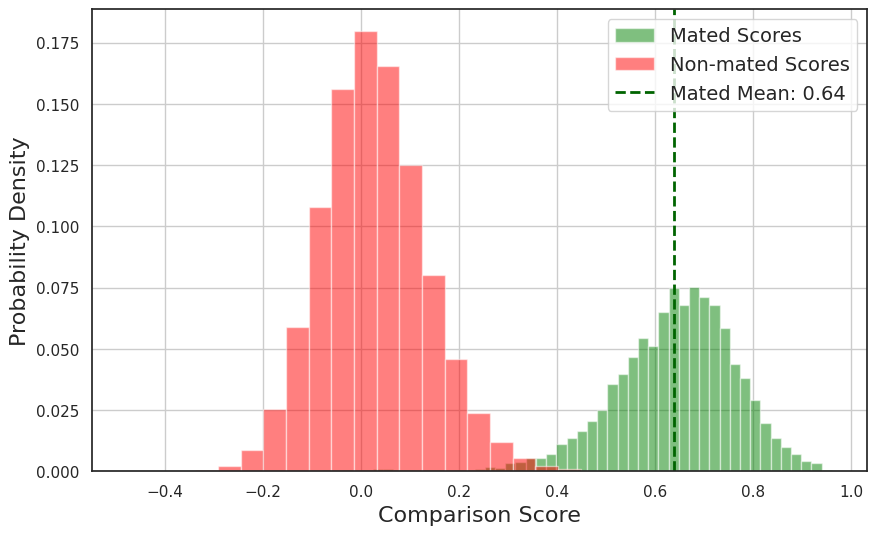

In [23]:


# def plot_histogram(mated_scores, nonmated_scores, normalise=True, savename=None, title="Histogram", save_fig_path="save_fig_path", gem_som = 'A1'):
#     def normalise_scores(distribution):
#         return np.ones_like(distribution) / len(distribution)

#     mated_mean = np.mean(mated_scores)

#     plt.figure(figsize=(10, 6))

#     if normalise:
#         plt.hist(mated_scores, bins=50, weights=normalise_scores(mated_scores), color='green', alpha=0.5, label='Mated Scores')
#         plt.hist(nonmated_scores, bins=30, weights=normalise_scores(nonmated_scores), color='red', alpha=0.5, label='Non-mated Scores')
#         ylabel = "Probability Density"
#     else:
#         plt.hist(mated_scores, bins=50, color='green', alpha=0.5, label='Mated Scores')
#         plt.hist(nonmated_scores, bins=30, color='red', alpha=0.5, label='Non-mated Scores')
#         ylabel = "Count"

#     plt.axvline(mated_mean, color='darkgreen', linestyle='--', linewidth=2, label=f'Mated Mean: {mated_mean:.2f}')

#     plt.xlabel("Comparison Score", size=16)
#     plt.ylabel(ylabel, size=16)
#     plt.title(title, size=20)
#     plt.grid(True)
#     plt.legend(loc='upper right', bbox_to_anchor=(1, 1), ncol=1, fontsize=14)  # Adjust legend parameters as needed

#     plt.savefig(f'{save_fig_path}{gem_som}.png')

#     plt.show()

plot_histogram(mated_scores1, nonmated_scores1, normalise=True, title = 'Adults - MagFace ex. 1.1 ', save_fig_path=save_fig_path, gem_som = 'A1')


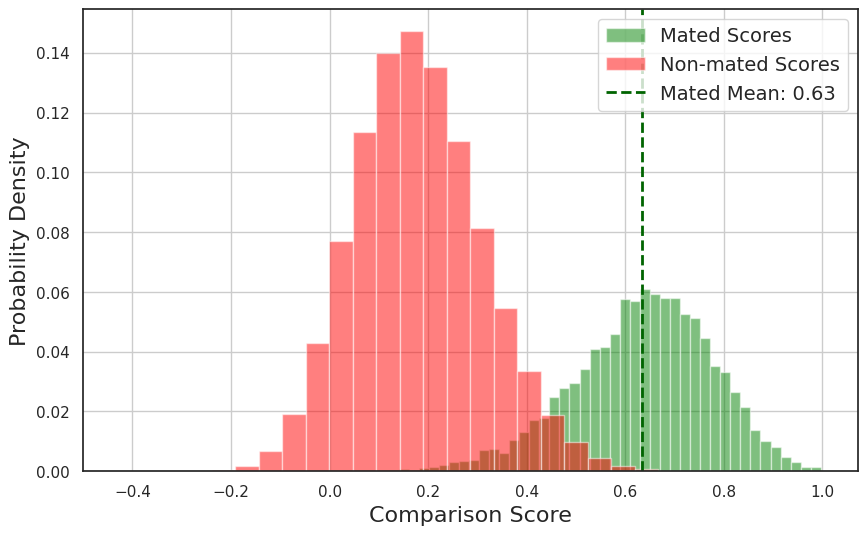

In [24]:
plot_histogram(mated_scores2, nonmated_scores2, normalise=True, title = 'Children - MagFace ex. 1.1 ', save_fig_path=save_fig_path, gem_som='C1')


# DET curves

In [25]:
d_prime_system1 = d_prime(mated_scores1, nonmated_scores1)
print("d' child =", round(d_prime_system1, round_digits))

d_prime_system2 = d_prime(mated_scores2, nonmated_scores2)
print("d' adult =", round(d_prime_system2, round_digits))


d' child = 5.21982
d' adult = 3.35782


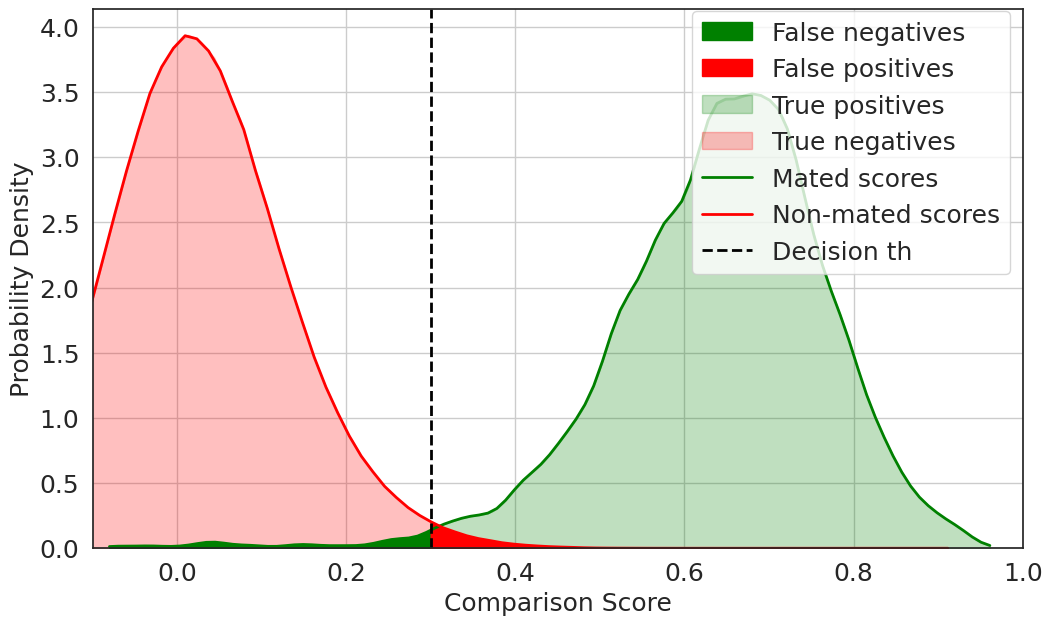

In [26]:
threshold1 = df_all_threshold_x[df_all_threshold_x.FNIR_c <0.05].Threshold.max()
# threshold1 = 0.320
kde_with_threshold(mated_scores1, nonmated_scores1, scores_type1, threshold1, save_fig_path=save_fig_path, title='A2')

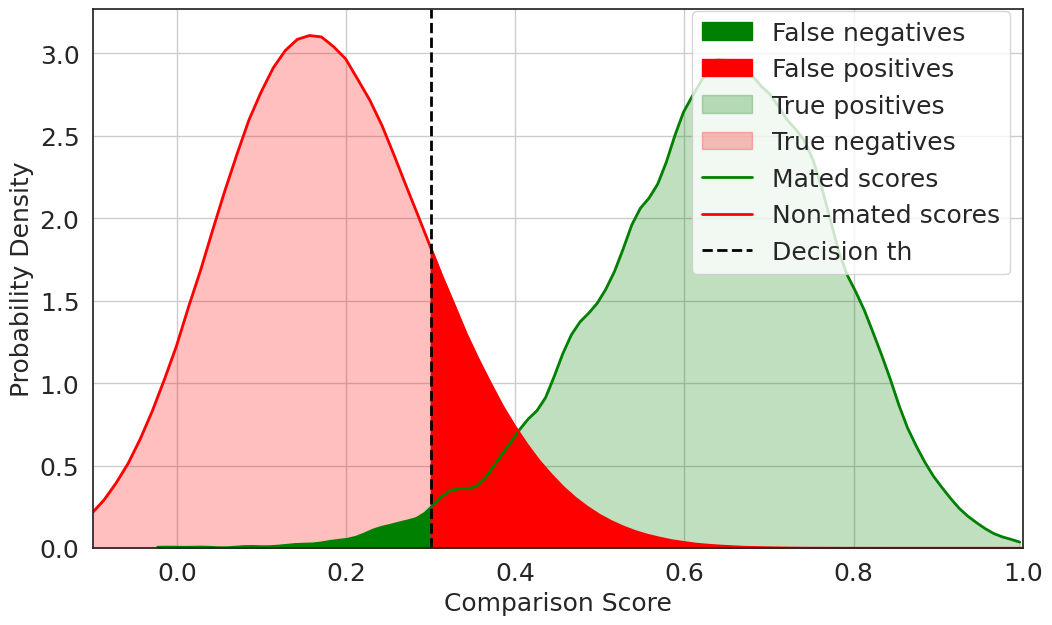

In [27]:
threshold2 = df_all_threshold_x[df_all_threshold_x.FNIR_c <0.05].Threshold.max()
# threshold2 = 0.320
kde_with_threshold(mated_scores2, nonmated_scores2, scores_type2, threshold2, save_fig_path=save_fig_path, title='C2')

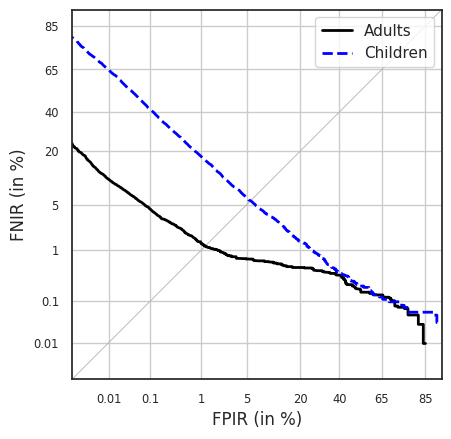

In [28]:


# def DET_plotting_1_1(mated_scores1, mated_scores2,nonmated_scores1, nonmated_scores2, score_type= "similarity",title = 'Adults vs Children - MagFace ex. 2.2', save_fig_path= 'save_fig_path'):
#     figure_size = (12,7)
#     alpha_shade = 0.25
#     alpha_fill = 1.0
#     linewidth = 2
#     legend_loc = "upper left"
#     legend_anchor = (1.0, 1.02)
#     legend_cols = 1
#     legend_fontsize = 18
#     label_fontsize = 18
#     tick_fontsize = 18
#     system_name1 = 'Adults'
#     system_name2 = 'Children'

#     det = DET(biometric_evaluation_type='identification', abbreviate_axes=True, plot_eer_line=True)#, plot_title=title)
#     det.x_limits = np.array([1e-5, .8])
#     det.y_limits = np.array([1e-5, .8])
#     det.x_ticks = np.array([1e-4, 1e-3, 1e-2, 5e-2, 20e-2, 40e-2, 80e-2])
#     det.x_ticklabels = np.array(['0.01','0.1', '1', '5', '20', '40', '80'])
#     det.y_ticks = np.array([1e-4, 1e-3, 1e-2, 5e-2, 20e-2, 40e-2, 80e-2])
#     det.y_ticklabels = np.array(['0.01','0.1', '1', '5', '20', '40', '80'])
#     det.create_figure()
#     det.plot(tar=adjust_scores_for_DET(mated_scores1, scores_type1), non=adjust_scores_for_DET(nonmated_scores1, scores_type1), label=system_name1)
#     det.plot(tar=adjust_scores_for_DET(mated_scores2, scores_type2), non=adjust_scores_for_DET(nonmated_scores2, scores_type2), label=system_name2)
#     det.legend_on(loc="upper right")
#     det.show()

# DET_plotting_1_1(mated_scores1, mated_scores2,nonmated_scores1, nonmated_scores2, "similarity",'Adults vs Children - MagFace ex. 1.1', save_fig_path)


def DET_plotting_1_1(mated_scores1, mated_scores2,nonmated_scores1, nonmated_scores2, score_type= "similarity",title = 'Adults vs Children - MagFace ex. 2.2', save_fig_path= 'save_fig_path'):
    figure_size = (12,7)
    alpha_shade = 0.25
    alpha_fill = 1.0
    linewidth = 2
    legend_loc = "upper left"
    legend_anchor = (1.0, 1.02)
    legend_cols = 1
    legend_fontsize = 18
    label_fontsize = 18
    tick_fontsize = 18
    system_name1 = 'Adults'
    system_name2 = 'Children'

    det = DET(biometric_evaluation_type='identification', abbreviate_axes=True, plot_eer_line=True)#, plot_title=title)
    # det.x_limits = np.array([1e-5, .8])
    # det.y_limits = np.array([1e-5, .8])
    det.x_limits = np.array([1e-5, .9])
    det.y_limits = np.array([1e-5, .9])
    det.x_ticks = np.array([ 1e-4, 1e-3, 1e-2, 5e-2, 20e-2, 40e-2, 65e-2, 85e-2, 95e-2])
    det.x_ticklabels = np.array(['0.01', '0.1', '1', '5', '20', '40', '65', '85', '95'])
    det.y_ticks = np.array([ 1e-4, 1e-3, 1e-2, 5e-2, 20e-2, 40e-2, 65e-2, 85e-2, 95e-2])
    det.y_ticklabels = np.array([ '0.01', '0.1', '1', '5', '20', '40', '65', '85', '95'])

    det.create_figure()
    det.plot(tar=adjust_scores_for_DET(mated_scores1, score_type), non=adjust_scores_for_DET(nonmated_scores1, score_type), label=system_name1)
    det.plot(tar=adjust_scores_for_DET(mated_scores2, score_type), non=adjust_scores_for_DET(nonmated_scores2, score_type), label=system_name2)
    det.legend_on(loc="upper right")
    det.show()

DET_plotting_1_1(mated_scores1, mated_scores2,nonmated_scores1, nonmated_scores2, "similarity",'Adults vs Children - MagFace ex. 1.1', save_fig_path)
